# Prepare .mat files for modeling with GBIS

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/20080929_20100520.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data
number of pixels: 126557
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlosAT424_20080929_20100520.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlosAT424_20080929_20100520.mat
showing...


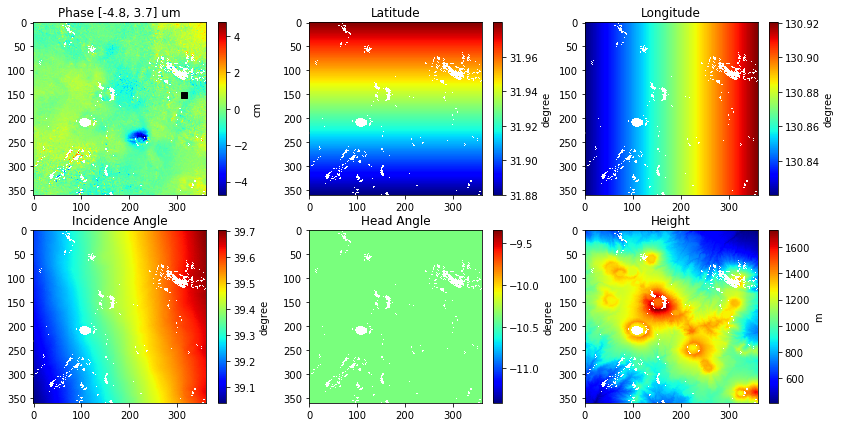

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/20081012_20100302.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data
number of pixels: 121216
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlosDT73_20081012_20100302.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlosDT73_20081012_20100302.mat
showing...


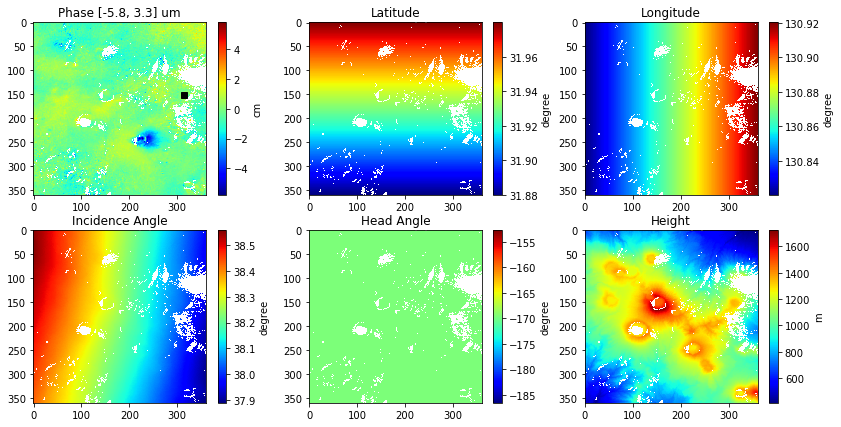

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/20150106_20171010.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data
number of pixels: 287586
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2AT131_20150106_20171010.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2AT131_20150106_20171010.mat
showing...


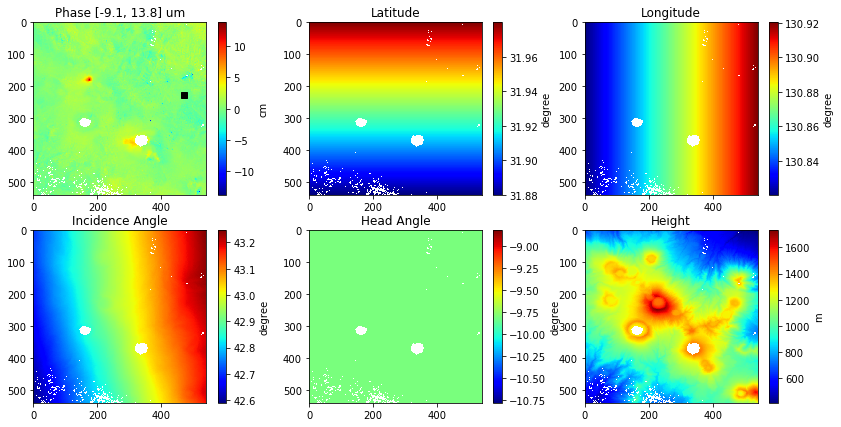

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/20150209_20170918.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data
number of pixels: 274456
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2DT23_20150209_20170918.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2DT23_20150209_20170918.mat
showing...


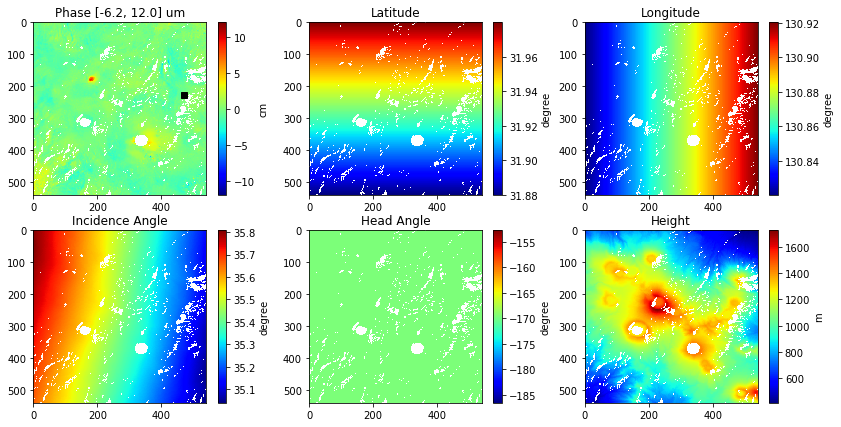

Done.


In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from mintpy.utils import readfile
from mintpy import save_gbis


## Common setting
ref_lat, ref_lon = 31.930, 130.864  #change reference pixel (optional)
out_dir = os.path.expanduser('~/insarlab/Kirishima/Model/data')


## Dataset Initiation
proj_names = [
    'KirishimaAlosAT424/mintpy',
    'KirishimaAlosDT73/mintpy',
    'KirishimaAlos2AT131/mintpy',
    'KirishimaAlos2DT23/mintpy',
]

for proj_name in proj_names:
    # grab project and file names
    proj_dir = os.path.expanduser('~/insarlab/Kirishima/{}'.format(proj_name))
    vel_file = os.path.join(proj_dir, 'velocity.h5')
    date12 = readfile.read_attribute(vel_file)['DATE12']
    unw_file = os.path.join(proj_dir, '{}.unw'.format(date12))
    geom_file = os.path.join(proj_dir, 'inputs/geometryGeo.h5')

    # run
    scp_args = '{} -g {} --out-dir {}'.format(unw_file, geom_file, out_dir)
    mat_file = save_gbis.main(scp_args.split())
print('Done.')